In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from fretboardgtr.elements.notes import FrettedNote, FrettedNoteConfig
from fretboardgtr.elements.nut import Nut, NutConfig
from fretboardgtr.elements.strings import String, StringConfig
from fretboardgtr.exporters import PNGExporter, register_exporter
from fretboardgtr.fretboard import FretBoard, FretBoardConfig

from IPython.display import Image, display

In [3]:
class IPythonExporter(PNGExporter):
    def export(self, to):
        super().export(to)
        display(Image(filename=to))


register_exporter(IPythonExporter, "DRAW")
def draw(fretboard, tmp_filepath="/tmp/fretboard.png"):
    fretboard.export(format="draw", to=tmp_filepath)

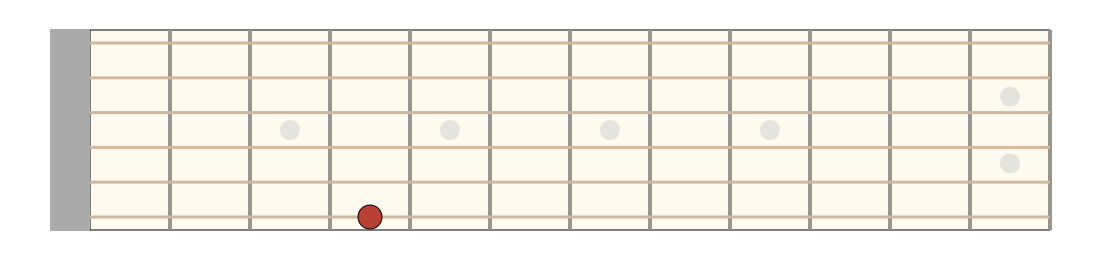

In [9]:
config = {
    "general": {
        "first_fret": 0,
        "last_fret": 12,
        "show_tuning": False,
        "x_start": 10,
        "show_frets": False,
        "fret_width": 80,
        "fret_height": 40,
        "x_end_offset": -30,
        "y_end_offset": -50,
    },
    "neck_dots": {
        "color": "rgb(229,227,222)",
        "width_stroke": 0,
        "radius": 10,
    },
    "nut": {"width": 0},
    "background": {"color": "rgb(254,250,240)", "opacity": 1},
    "frets": {"color": "rgb(152,150,145)", "width": 4},
    "fret_numbers": {"color": "rgb(150,150,150)", "fontsize": 20, "fontweight": "bold"},
    "strings": {"width": 0},
}

fretboard_config = FretBoardConfig.from_dict(config)

fretboard = FretBoard(config=fretboard_config)

(ulx, uly), (lrx, lry) = fretboard.get_inside_bounds()
n_frets = fretboard_config.general.last_fret - fretboard_config.general.first_fret + 1
n_strings = 6
fret_x = (lrx - ulx) // n_frets
fret_y = (lry - uly) // (n_strings - 1)

string_width = 3
string_padding = fret_y // 3
top_string_y = uly + string_padding
bottom_string_y = lry - string_padding
string_y = (bottom_string_y - top_string_y) / (n_strings - 1)
for string_num in range(n_strings):
    y = top_string_y + string_y * string_num
    string = String(
        start_position=(ulx + fret_x, y),
        end_position=(lrx, y),
        config=StringConfig(color="rgb(209,183,156)", width=string_width)
    )
    fretboard.add_element(string)


nut_width = fret_x * 1/2
nut_x = ulx + fret_x - nut_width // 2
nut = Nut(
    start_position=(nut_x, uly - 1),
    end_position=(nut_x, lry + 1),
    config=NutConfig(color="rgb(170,170,170)", width=nut_width)
)
fretboard.add_element(nut)


x = 4
y = 5
pos_x = ulx + (x + 1/2) * fret_x if x > 0 else nut_x
pos_y = top_string_y + y * string_y
fretboard.add_element(FrettedNote(name="", position=(pos_x, pos_y), config=FrettedNoteConfig(
    color="rgb(183,64,50)",
    radius=12,
    stroke_width=1,
)))


# In getting this to look exactly how I wanted, I had to make a couple changes to the fretboardgtr library:
# TODO: Clean these changes up and fork the library. Consider submitting a PR.
# 1. Add `stroke` and `stroke_width` to the svgwrite.shapes.Rect constructor in fretboardgtr/elements/background.py
#    to get a border around the fretboard.
# 2. Nudge the double inlay dots inward in fretboardgtr/fretboards/fretboard.py to account for string padding.

draw(fretboard)